

# Project: Investigate TMDb Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


The Movie Database (TMDb) dataset contains a the details of the movies displayed on their website. The data that the website contains for each movie is vast, from the Title and Date of the movie to the budget and revenue generated by the film at the time of screening and adjusted for today's inflation rate. Data from this dataset shows movies from the early 1960s to mid 2010s giving a large period of time for generational and time based changes to occur. 

As a result the questions that I shall be answering in the report look at the change in aspects of cinema over the decades and the years to see whether there are obvious changes in peoples attitudes and what type of films are repeatedly created. 
A key part of this is to analyse the change is commonly produced genres throughout the decades. I have chosed to look at the change over the decades as I believe that there will unlikely be a large swing of genre change year on year given the time it takes to produce a movie however within decades it will be able to capture films produced throughout that entire cycle.

The second question that I shall look at is how the runtime of films has changed as a result of time and a further analysis into general runtime statistics such as the average runtime throughout the years. What is special about the maximum runtime film vs the shortest runtime film etc. Finally a graphical presentation of how runtime has changed throughout the release years and release decades will be produced. I have chosen to look at runtime as my second variable dependent on time as I believe that this can bring information about the technological capabilities throughout the years within the cinema industry.

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

In this section an initial assessment of the dataset will be performed. It is important to assess the data before performing and cleaning activities to assess whether there is any extraneous data, problematic data, or null data.
Problematic data will not be immediately discard but assess whether it has any benefit to the analysis that is planned. If it does not pose a benefit to the assessment it will be discarded however if it is necessary to gain information about the dataset then a way of using the data will be determined.

### General Properties

In [133]:
#loading the tmdb-movies csv file as a pandas dataframe
#previewsing few initial lines of the imported dataset

df = pd.read_csv('tmdb-movies.csv')
df.head(4)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09


From this initial preview of the dataset a few things stand out immediately. Firstly there are two different columns determining an id for the film, only one of these will be necessary, similarly there are two forms of release date, 'release_year' and 'release_date'. Secondly, the budget and revenue metrics are in dollars but are referring to a very high dollar count, it may be prudent to change this to a different prefix such as M$ aka millions of dollars. Another key thing that can be seen is that 'cast', 'genres', 'production_companies' data is a single string delimited by a pipe '|'. To interact with this data properly these will need to be separated into a list or separate columns. A few columns stand out as of limited use: 'homepage', 'tagline', 'overview', 'keywords'. 

In [134]:
#looking at the datatypes and how many non-null values there are for each of the columns in the dataset to identify weaknesses
#in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

From the .info() command, a lot of information regarding the whole dataset is presented. It shows us the size and shape of the dataset, 10866 rows, 21 columns. It also shows us the type of data in each columns, this dataset is entirely comprised of integers, objects, and floats. The most important bit of information gained from this assessment is the number of non-null values in each columns. It is clear from this that there is a lot of missing data in some columns, ie 'homepage', 'production_companies', 'tagline', 'keywords'. Thankfully the majority of these columns have already been identified as droppable.


### Data Cleaning 



As mentioned in the data wrangling section, there are some columns that can be dropped from the offset to help with the cleaning of the data. Similarly, it is a prime opportunity in early data cleaning phases to drop and perfectly duplicate rows. It is not sensible to drop rows in which there are duplicate values as other rows such as 'original_title' as there may be mutliple films with the same title but are completely separate films.

In [135]:
df.drop(['keywords', 'tagline', 'overview', 'homepage'], axis=1, inplace=True)
df.drop_duplicates()
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


The first cleaning process that has been done is to drop the already determined columns. Another simple cleaning process that has been rolled up into this as well is to drop any completely duplicate rows. The number of rows in the dataset dropped to 10865, which shows that a single duplicate row was found and dropped. 

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 17 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(6), object(7)
memory usage: 1.4+ MB


In [137]:
# At this point I have realised that the 'production_companies' row is not going to be used in the further
# exploratory analysis.

df.drop(['production_companies'], axis = 1, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: What is the most commonly produced movie genres for each decade.

As mentioned in the introduction, a interesting point to analyse is the change in popular movie genres through the 6 decades that the dataset encompasses. This question seeks to identify, for each decade (60s,70s,80s,90,00s,10s), which is the most commonly produced genre of movie. The commonality of movies produced is what is definining the popularity of the movie in this question, not a pulic opinion poll. If a genre has been produced 50 times vs one that has been produced 10 times, the 50 times genre is considered a more popular genre.

In [138]:
# First thing to do is to create a reduced dataset that includes just the information that is necessary for this analysis.
#By using .copy() the analysis performed in question 1 is not directly impacting the initial cleaned dataframe which means for 
#further questions this df_clean can be used as the starting point.

dataset_one = df[['id','release_year', 'popularity', 'budget', 'revenue', 'original_title', 'vote_average', 'budget_adj', 'revenue_adj', 'genres']].copy()
dataset_one.head(2)

,id,release_year,popularity,budget,revenue,original_title,vote_average,budget_adj,revenue_adj,genres
0,135397,2015,32.985763,150000000,1513528810,Jurassic World,6.5,1.379999e+08,1.392446e+09,Action|Adventure|Science Fiction|Thriller
1,76341,2015,28.419936,150000000,378436354,Mad Max: Fury Road,7.1,1.379999e+08,3.481613e+08,Action|Adventure|Science Fiction|Thriller


At this point, I have decided that I may want to look at the profit of specific genres if I have the time in the future and as such will create an additional column to the dataset called profit which takes the adjusted revenue and subtracts the adjusted budget.

In [139]:
profit = dataset_one['revenue_adj']-dataset_one['budget_adj']
dataset_one['profit'] = profit
dataset_one.head(2)

,id,release_year,popularity,budget,revenue,original_title,vote_average,budget_adj,revenue_adj,genres,profit
0,135397,2015,32.985763,150000000,1513528810,Jurassic World,6.5,1.379999e+08,1.392446e+09,Action|Adventure|Science Fiction|Thriller,1.254446e+09
1,76341,2015,28.419936,150000000,378436354,Mad Max: Fury Road,7.1,1.379999e+08,3.481613e+08,Action|Adventure|Science Fiction|Thriller,2.101614e+08


Before any analysis can be performed on the data with regards to the genres the string which is delimited by '|' pipe needs to separated up into individual genres. To do this I will split the string at the delimited '|' and at each occurence produce a new column with the individual genre included in it. 

This method has be taken from an online source on how to separated delimited strings into multiple columns: https://apassionatechie.wordpress.com/2018/02/24/how-do-i-split-a-string-into-several-columns-in-a-dataframe-with-pandas-python/

In [140]:
# split  genre column string into multiple columns 
genres_split = (dataset_one['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genres_{x+1}"))
genres_split.head(2)

,genres_1,genres_2,genres_3,genres_4,genres_5
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None


As each genre is now in its own column, each movie now has its genres attached to itself individually for example Jurassic World can be analysed as being Action, or Adventure, Thriller etc. These split columns need to be joined to the initial dataset, and then the original 'genres' column can be dropped.

In [141]:
dataset_one = dataset_one.join([genres_split])
dataset_one.drop(['genres'], axis=1, inplace=True)
dataset_one.head(2)

,id,release_year,popularity,budget,revenue,original_title,vote_average,budget_adj,revenue_adj,profit,genres_1,genres_2,genres_3,genres_4,genres_5
0,135397,2015,32.985763,150000000,1513528810,Jurassic World,6.5,1.379999e+08,1.392446e+09,1.254446e+09,Action,Adventure,Science Fiction,Thriller,None
1,76341,2015,28.419936,150000000,378436354,Mad Max: Fury Road,7.1,1.379999e+08,3.481613e+08,2.101614e+08,Action,Adventure,Science Fiction,Thriller,None


A final bit of preparation for the dataset for this question involves the production of a further column called decade which takes the 3rd digit in the release year ie 6,7,8 and puts this into a separte column called 'decade'.

In [142]:
#the data type of the 'release year' column is changed from an int64 to a string
#the 3rd [2] index of the string is then taken and made into a new column called 'decade'
#the dataset is then grouped by the values of the new column
dataset_one.release_year = dataset_one.release_year.astype(str)
dataset_one['decade'] = dataset_one.release_year.str[2]
dataset_one['decade']
dataset_one_sorted = dataset_one.groupby('decade')

#Given that the analysis is to be done by comparing decades of change within the variables
#it is important to know how many movies are in the dataset from each decade to see how 
#representative the data is.

specific_decades = '5', '6', '7', '8', '9', '0', '1'
for dates in specific_decades:
    df_decades = dataset_one['decade'].str.contains(dates).fillna(False)
    print('The total number of movies in the ',dates, "0's =", len(df[df_decades]))

The total number of movies in the  5 0's = 0
The total number of movies in the  6 0's = 362
The total number of movies in the  7 0's = 508
The total number of movies in the  8 0's = 1063
The total number of movies in the  9 0's = 1765
The total number of movies in the  0 0's = 3562
The total number of movies in the  1 0's = 3606


At this point the dataset has been cleaned to the point that all the necessary information for each film is available and as such each bit of analysis can be performed.

#### Most commonly produced film by decade

In [143]:
df_common = dataset_one.loc[:, 'genres_1':'genres_5']
df_common = df_common.join(dataset_one[['release_year', 'decade']])
df_common.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 7 columns):
genres_1        10843 non-null object
genres_2        8515 non-null object
genres_3        5079 non-null object
genres_4        1981 non-null object
genres_5        542 non-null object
release_year    10866 non-null object
decade          10866 non-null object
dtypes: object(7)
memory usage: 594.4+ KB


In [144]:
df_common.describe()

,genres_1,genres_2,genres_3,genres_4,genres_5,release_year,decade
count,10843,8515,5079,1981,542,10866,10866
unique,20,20,20,20,19,56,6
top,Drama,Drama,Thriller,Thriller,Thriller,2014,1
freq,2453,1619,886,450,120,700,3606


Df_common has been created as a heavily cleaned data set that contains simply the data required to compare the genre of films produced versus the decade in which it was produced. The intention from this is to create decade grouped subsets of this dataframe to then plot next to eachother on a bar graph showing the frequency of each genre in each decade making it visually obvious which was the most commonly produced genre of film each decade. The subsetting and subsequent plotting will be done in the below cells.

In [145]:
#creating subsets for each decade using .copy() to detach subset from source dataframe

df_1960s = df_common[df_common.decade == '6'].copy()
df_1970s = df_common[df_common.decade == '7'].copy()
df_1980s = df_common[df_common.decade == '8'].copy()
df_1990s = df_common[df_common.decade == '9'].copy()
df_2000s = df_common[df_common.decade == '0'].copy()
df_2010s = df_common[df_common.decade == '1'].copy()

#checking that the subsets have split correctly
df_2000s.head(3)

,genres_1,genres_2,genres_3,genres_4,genres_5,release_year,decade
1386,Action,Adventure,Fantasy,Science Fiction,None,2009,0
1387,Drama,Action,Thriller,War,None,2009,0
1388,Fantasy,Action,Adventure,Science Fiction,Thriller,2009,0


In [146]:
#removing the unnecessary release year and decade columns from each subset as they are already grouped by decade
df_1960s.drop(['release_year', 'decade'], axis=1, inplace=True)
df_1970s.drop(['release_year', 'decade'], axis=1, inplace=True)
df_1980s.drop(['release_year', 'decade'], axis=1, inplace=True)
df_1990s.drop(['release_year', 'decade'], axis=1, inplace=True)
df_2000s.drop(['release_year', 'decade'], axis=1, inplace=True)
df_2010s.drop(['release_year', 'decade'], axis=1, inplace=True)

In [147]:
#stacking the subsets such that the genres become the index of the dataset
#this means that a count can be performed of how often each genre is produced in each decade

df_1960s = df_1960s.stack().value_counts()
df_1970s = df_1970s.stack().value_counts()
df_1980s = df_1980s.stack().value_counts()
df_1990s = df_1990s.stack().value_counts()
df_2000s = df_2000s.stack().value_counts()
df_2010s = df_2010s.stack().value_counts()

In [148]:
#sorting the index values (genres). Given that they are strings they will be sorted alphabetically. This is an important 
#stage to ensure each subset has equivalent indexing instead of one subset index going documentary, fantasy, sci-fi while another
#starts action, adventure, animation etc.

df_1960s.index.sort_values()
df_1960s = df_1960s.sort_index()

df_1970s.index.sort_values()
df_1970s = df_1970s.sort_index()

df_1980s.index.sort_values()
df_1980s = df_1980s.sort_index()

df_1990s.index.sort_values()
df_1990s = df_1990s.sort_index()

df_2000s.index.sort_values()
df_2000s = df_2000s.sort_index()

df_2010s.index.sort_values()
df_2010s = df_2010s.sort_index()

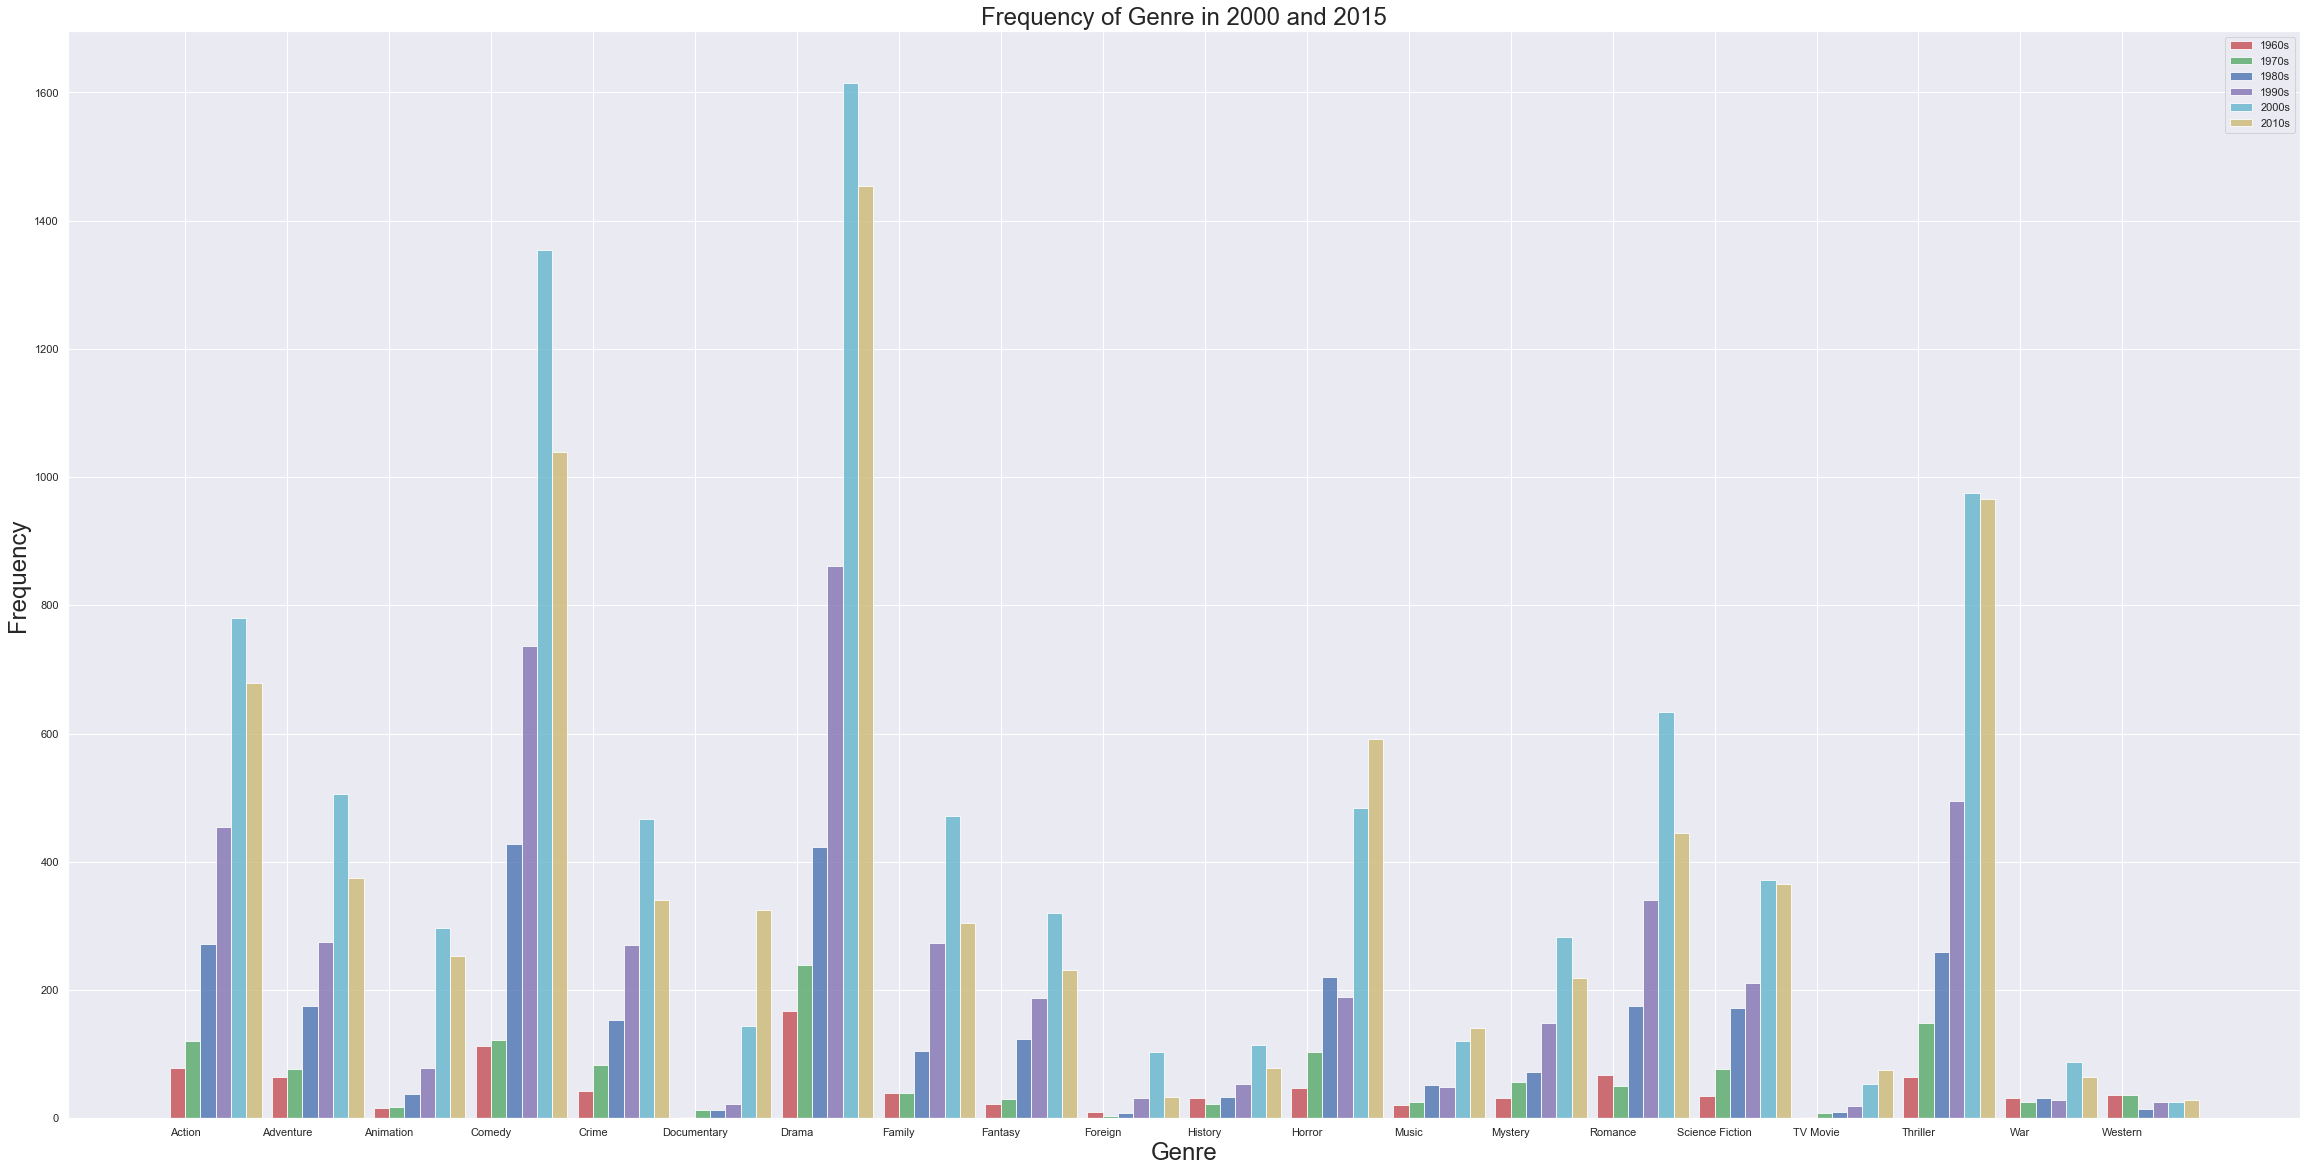

In [172]:
#plotting the graph. For this graph the labels for the bars are defined by the sorted index values from the 1960s subset however
#due to the previous cell any subset could have been used and the same results found.
labels = df_1960s.index.sort_values()
val = np.arange(len(df_1960s)) #creating the y values for each genre
width = 0.15 #setting the width of each bar, this was selected through trial and error
width_2 = 0.3
width_3 = 0.45
width_4 = 0.6
width_5 = 0.75
#a bar graph is produced for each of the subsets. The colour of each bar is different and the transparency of the bars are set to
#just below 1 to ensure each bar can be see incase they overlap. A label is defined for each graph to allow for the creation of a
#legend highlighting which colour bar represents which decade.

bar_60s = plt.bar(val, df_1960s, width, color='r', alpha=.8, label = '1960s')
bar_70s = plt.bar(val + width, df_1970s, width, color='g', alpha=.8, label = '1970s')
bar_80s = plt.bar(val + width*2, df_1980s, width, color='b', alpha=.8, label = '1980s')
bar_90s = plt.bar(val + width*3, df_1990s, width, color='m', alpha=.8, label = '1990s')
bar_00s = plt.bar(val + width*4, df_2000s, width, color='c', alpha=.8, label = '2000s')
bar_10s = plt.bar(val+ width*5, df_2010s, width, color='y', alpha=.8, label = '2010s')

# title and labels
plt.ylabel('Frequency', fontsize = 24)
plt.xlabel('Genre', fontsize = 24)
plt.title('Frequency of Genre in 2000 and 2015', fontsize = 24)
locations = val + width / 2  # xtick locations
labels = labels # xtick labels
plt.xticks(locations, labels)
plt.rcParams["figure.figsize"] = (300,300)
# legend
plt.legend();

From this graph it is immediately evident what the most commonly produced genre of film is in each decade, as well as how this compares to the the other genres produced that decade.


    For the 60s it was Dramas 
    For the 70s it was Dramas 
    For the 80s it was Comedies 
    For the 90s it was Dramas 
    For the 00s it was Dramas  
    For the 10s it was Dramas 

### Research Question 2 : Analysing the runtimes of movies

When looking at the variables that are present in the raw TMDb dataset one variable that is not influenced by public influence such as popularity or revenue (revenue_adj) is the runtime of the film. When initially looking at this dataset it does not pertain to much information however when considering how the runtime could be linked to the technology available at a time period or for a change in film philosophy the runtime is actually a very interesting variable to examine. In this question the general 

In [150]:
#A clean dataset is created for analysis in Question 2
dataset_2 = df.copy()
dataset_2.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


At this point I have noticed that by removing zero values in the origina dataset any cases where the runtime of a film is zero will be removed as this is erroneous data.

In [151]:
#the following columns are populated with zero values, converting this to a NaN would allow .dropna() to remove all null data
#from the dataset: budget, revenue, budget_adj, revenue_adj, runtime
dataset_2['budget'].replace(0, np.NAN, inplace=True)
dataset_2['budget_adj'].replace(0, np.NAN, inplace=True)
dataset_2['revenue'].replace(0, np.NAN, inplace=True)
dataset_2['revenue_adj'].replace(0, np.NAN, inplace=True)
dataset_2['runtime'].replace(0, np.NAN, inplace=True)

#now the number of null values in each budget, revenue and runtime can be determined. 
#budget and revenue _adj and _adj_m aren't required as they are dependent on budget and revenue)
budgetna = dataset_2['budget'].isnull().sum()
revenuena = dataset_2['revenue'].isnull().sum()
runtimena = dataset_2['runtime'].isnull().sum()

print('The number of null budget values was', budgetna)
print('The number of null revenue values was', revenuena)
print('The number of null runtime values was', runtimena)

dataset_2 = dataset_2.dropna()

The number of null budget values was 5696
The number of null revenue values was 6016
The number of null runtime values was 31


The above cell identifies zero values and replaces them inplace as a Pandas NaN. A sum is performed to be able to print the number of null values. This is important as the final function performed is the removal of any rows with NaN data. As a result of this the 10000 data set has been reduced to ~4000. By performing a sum of the number of null values in the specific rows I can print this value and see which column was the biggest contributor to null values in the dataset. As a lot of columns have been removed by doing this it will be interesting to compare how using the pre and post .dropna() datasets compare.

A key bit of information that can be garnered from the information available in the dataset is the average of the a specific column such as runtime. For ease of analysis if further analysis is required on other columns a function can be defined to determine the average of any column that you pass as a argument through it. This function has been made for any column in dataset_2 so that the null values arent included in the average. 

In [156]:
def getAverageNonNull(column):
    return dataset_2[column].mean()

def getAverageWNull(column):
    return df[column].mean()

In [157]:
#Using the getAverageNonNull formula to calculate the average movie runtime on clean data
#Using the getAverageWNull formula to calculate the average movie runtime on raw data

average_runtime = getAverageNonNull('runtime')
print('The average runtime of the movies within the clean dataset is', average_runtime)

average_runtime_raw = getAverageWNull('runtime')
print('The average runtime of the movies within the raw dataset is', average_runtime_raw)

The average runtime of the movies within the clean dataset is 109.21298701298701
The average runtime of the movies within the raw dataset is 102.07086324314375


In [173]:
#Similar to getting the average a function can be defined for calculating the min and max movie of a column,
#this will be used to find the minumum and maximum runtime movies
#this formula will run off the idxmin and idxmax functions that return the first instace of the minumum or maximum 
#values over a series that has been determined.
#previous attempted to produce this formula used min() and max() but wouldnt allow for the corresponding index and
#hence the corresponding movie title could not be achieved unless looking for a movie with a runtime == value
#but this didnt account for cases where there were multiple films with identical runtimes. As such idxmax and idxmin
#help for use of this function was got from https://www.geeksforgeeks.org/python-pandas-dataframe-idxmin/

def getMinNonNull(column):
    minimum_val = dataset_2[column].idxmin()
    
    #print the film title and value
    print("The movie with the lowest "+ column + "  : ",dataset_2['original_title'][minimum_val])
    print('The ' + column + " of this movie is", dataset_2[column].min())
    
    return

def getMaxNonNull(column):
    max_val = dataset_2[column].idxmax()
    
    #print the film title and value
    print("The movie with the highest "+ column + "  : ",dataset_2['original_title'][max_val])
    print('The ' + column + " of this movie is", dataset_2[column].max())


In [159]:
min_runtimeNonNull = getMinNonNull('runtime')
max_runtimeNonNull = getMaxNonNull('runtime')

The movie with the lowest runtime  :  Kid's Story
The runtime of this movie is 15.0
The movie with the highest runtime  :  Carlos
The runtime of this movie is 338.0


Looking at these values it would be interesting to see how big of an impact the null values caused and see whether additional movies have higher or lower runtimes when the null values arent removed

In [160]:
def getMinWNull(column):
    minimum_val = df[column].idxmin()
    
    #print the film title and value
    print("The movie with the lowest "+ column + "  : ",df['original_title'][minimum_val])
    print('The ' + column + " of this movie is", df[column].min())
    
    return

def getMaxWNull(column):
    max_val = df[column].idxmax()
    
    #print the film title and value
    print("The movie with the highest "+ column + "  : ",df['original_title'][max_val])
    print('The ' + column + " of this movie is", df[column].max())



In [161]:
min_runtime_overall = getMinWNull('runtime')
max_runtime_overall = getMaxWNull('runtime')

The movie with the lowest runtime  :  Mythica: The Necromancer
The runtime of this movie is 0
The movie with the highest runtime  :  The Story of Film: An Odyssey
The runtime of this movie is 900


It is interesting to see that with the null values included the lowest runtime fil is Mythica: The Necromancer. This is an error in the data as a google search has shown the runtime of this film the be 95minutes. Even more interesting however is the revelation that the film 'The Story of Film: An Odyssey' is the longest runtime film at 900 minutes. This movie aired in several 'chapters' on the BBC which contributed to its gargantuan runtime (15hours). This was lost in the removal of null data as cases where the monetary values were 0 were also removed. As a result an error in budget or revenue data caused this movie to be lost from the analysis.

Now that the average, min and maximum values have been found, it would be interesting to represent this graphically. Through plots such as histograms and box plots.


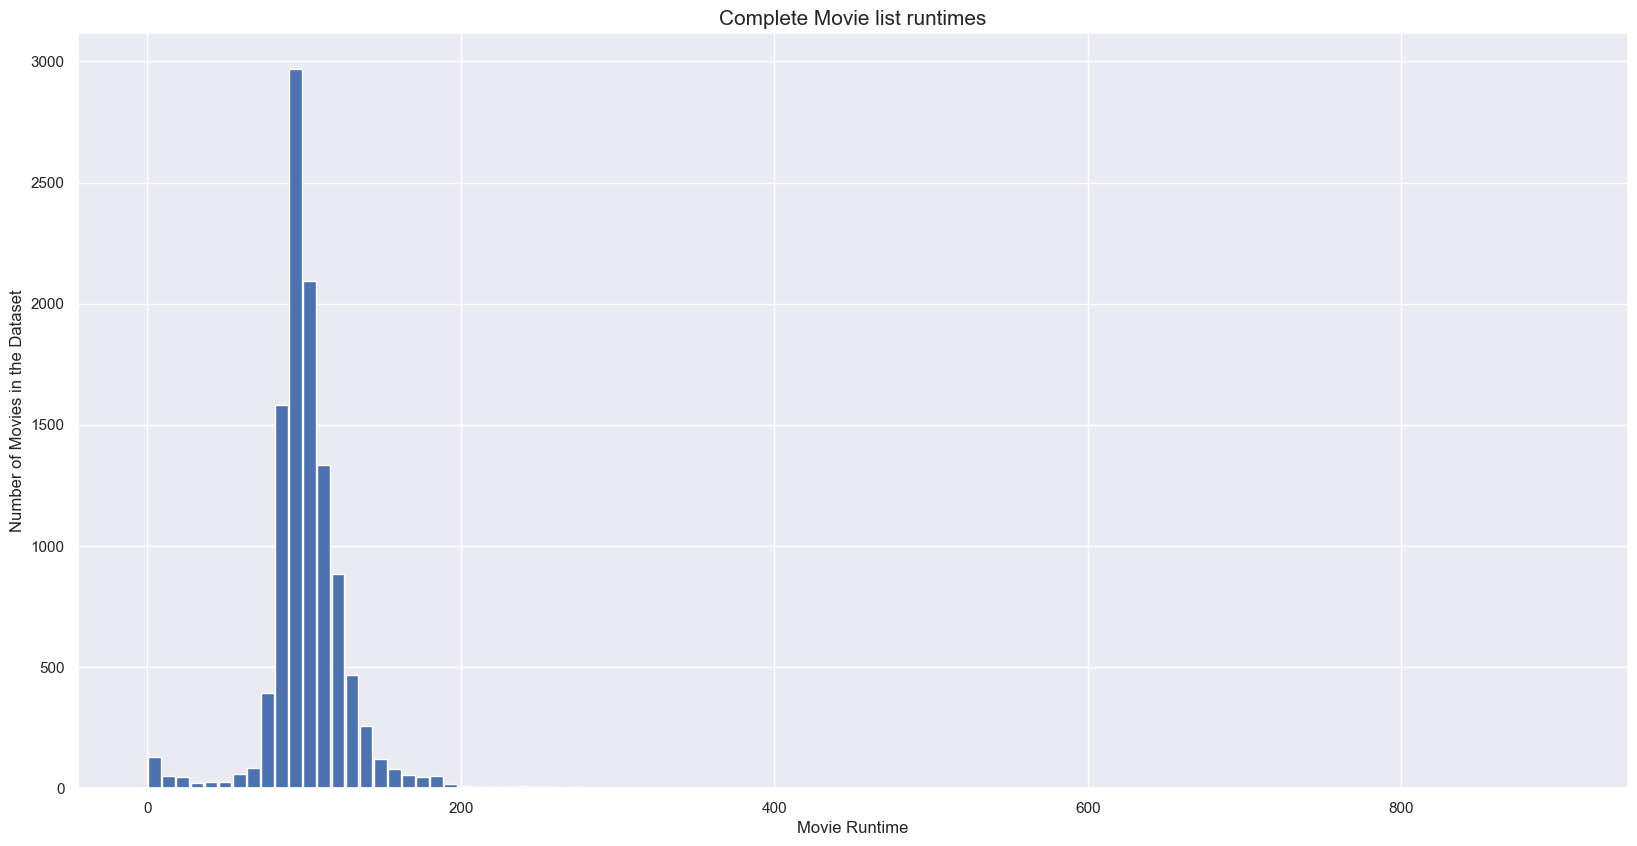

In [162]:
#plotting a histogram of runtime of movies overall movies

plt.figure(figsize=(20,10), dpi = 100)

#x-axis labels 
plt.xlabel('Movie Runtime', fontsize = 12)
#y-axis labels 
plt.ylabel('Number of Movies in the Dataset', fontsize=12)
#Graph Title
plt.title('Complete Movie list runtimes', fontsize=15)

#giving a histogram plot, and selecting an appropriate bin size (this is established through trial and error)
plt.hist(df['runtime'], rwidth = 0.9, bins =100)
plt.show()

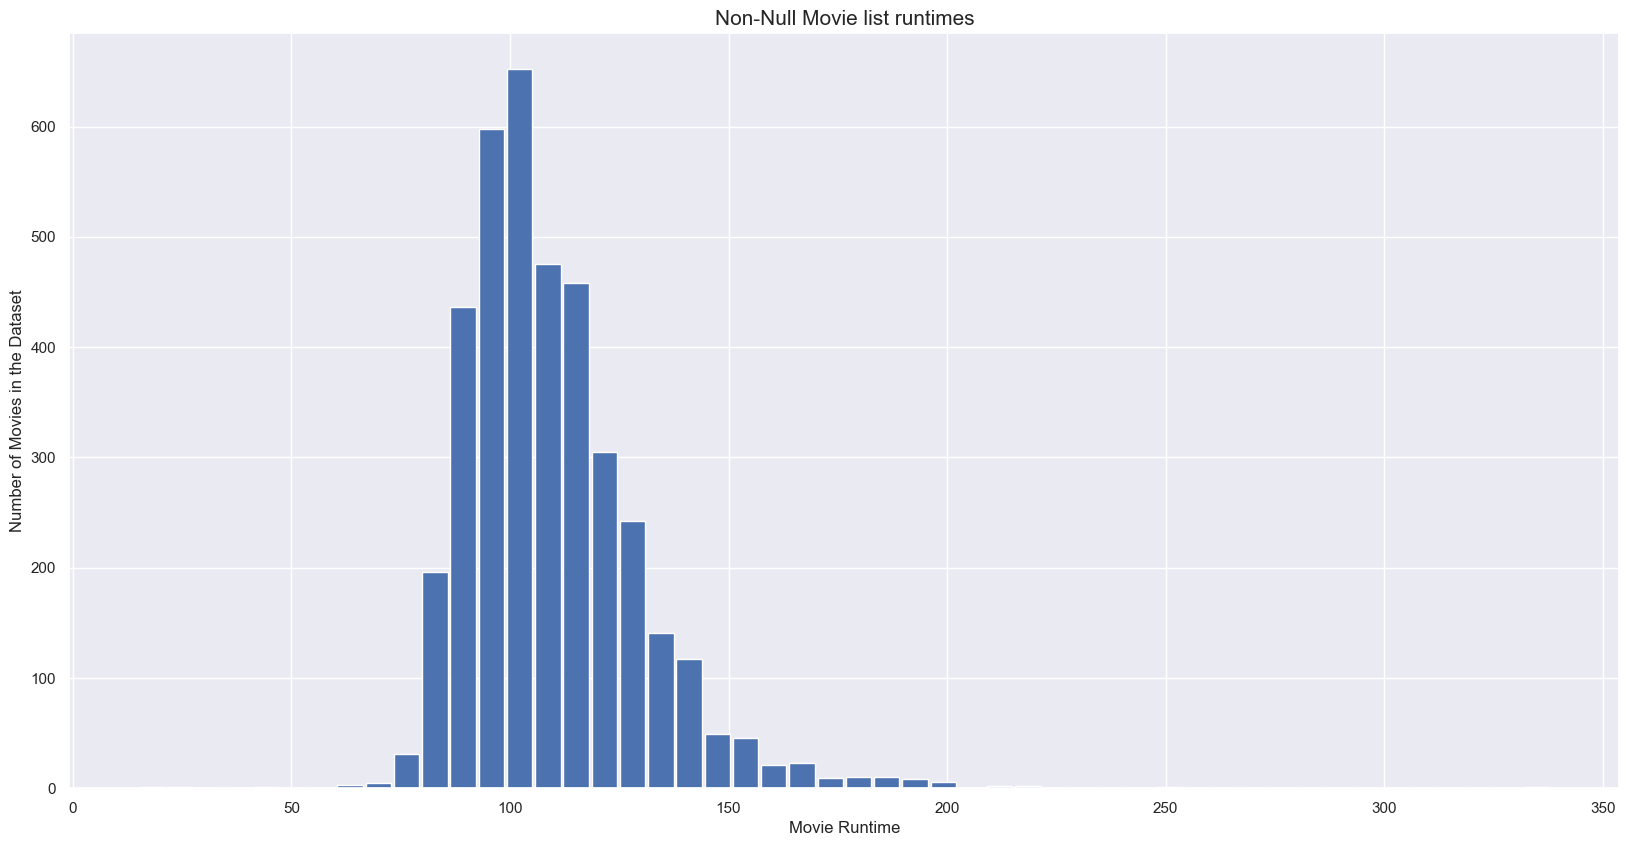

In [163]:
#comparative histogram showing just the non-null dataset values

plt.figure(figsize=(20,10), dpi = 100)

#x-axis labels 
plt.xlabel('Movie Runtime', fontsize = 12)
#y-axis labels 
plt.ylabel('Number of Movies in the Dataset', fontsize=12)
#Graph Title
plt.title('Non-Null Movie list runtimes', fontsize=15)

#giving a histogram plot, and selecting an appropriate bin size (this is established through trial and error)
plt.hist(dataset_2['runtime'], rwidth = 0.9, bins =50)
plt.show()

It is very interesting looking at the difference between the cleaned and non cleaned histograms for the runtime of the movies. The overall shape of the distribution is very similar but it appears that there is a lot of low runtime movies that get cut off from the zero data removal. 

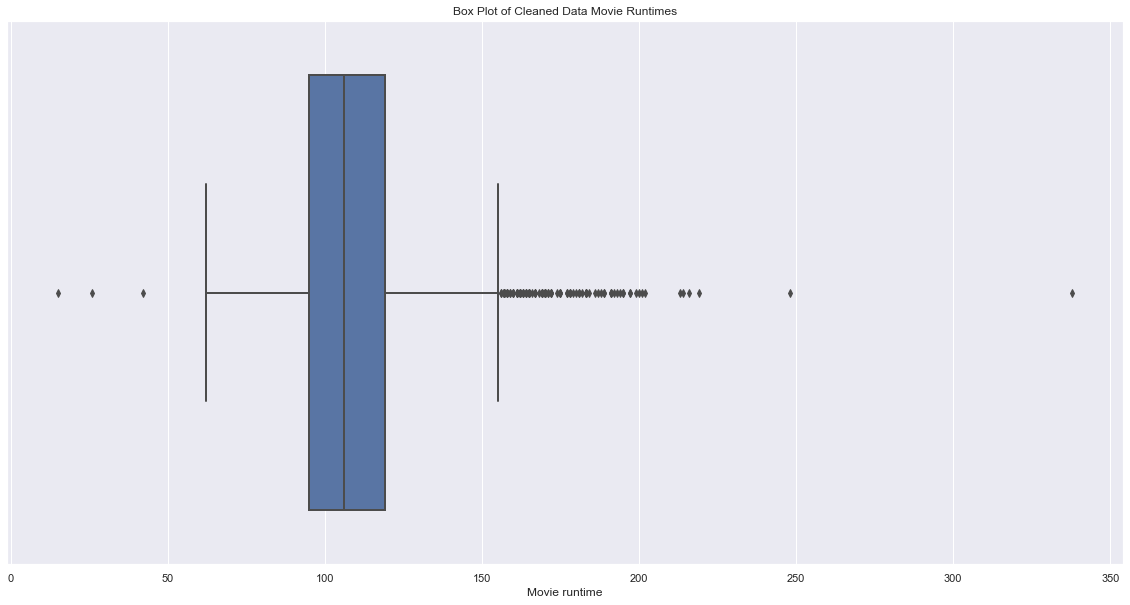

In [164]:
#Producing a boxplot to highlight the quantile ranges using seaborn for a better graphic 

plt.figure(figsize=(20,10))
sns.boxplot(dataset_2['runtime'], linewidth = 2)
plt.xlabel('Movie runtime')
plt.title('Box Plot of Cleaned Data Movie Runtimes')
plt.show()

In [165]:
#finding and printing the upper and lower quantile ranges for the runtime in the cleaned movie dataset
dataset_2.describe()
q25 = dataset_2['runtime'].quantile(0.25)
q75 = dataset_2['runtime'].quantile(0.75)
print("The 25% quantile of the cleaned movies runtime is :", q25)
print("The 75% quantile of the cleaned movies runtime is :", q75)

The 25% quantile of the cleaned movies runtime is : 95.0
The 75% quantile of the cleaned movies runtime is : 119.0


In [166]:
# calculating the number of movies outside of the upper and lower quantiles.
no_movies_below = len(dataset_2[dataset_2['runtime'] < 95])
no_movies_above = len(dataset_2[dataset_2['runtime'] > 119])
movies_within = (len(dataset_2['runtime']) - (no_movies_below + no_movies_above))
print('The number of movies below the lower quantile range is: ', no_movies_below)
print('The number of movies above the upper quantile range is: ', no_movies_above)
print('The number of movies within the quantile range is :', movies_within)

The number of movies below the lower quantile range is:  863
The number of movies above the upper quantile range is:  942
The number of movies within the quantile range is : 2045


A lot of interesting information has been achieved by looking at the statistics gleamed from the data so far. A final piece of information that would be useful to see would be how the runtime of the movies varies with year released.

Text(0.5, 1.0, 'How Runtime of a Movie varies depending on year it was released: Raw and Clean Data')

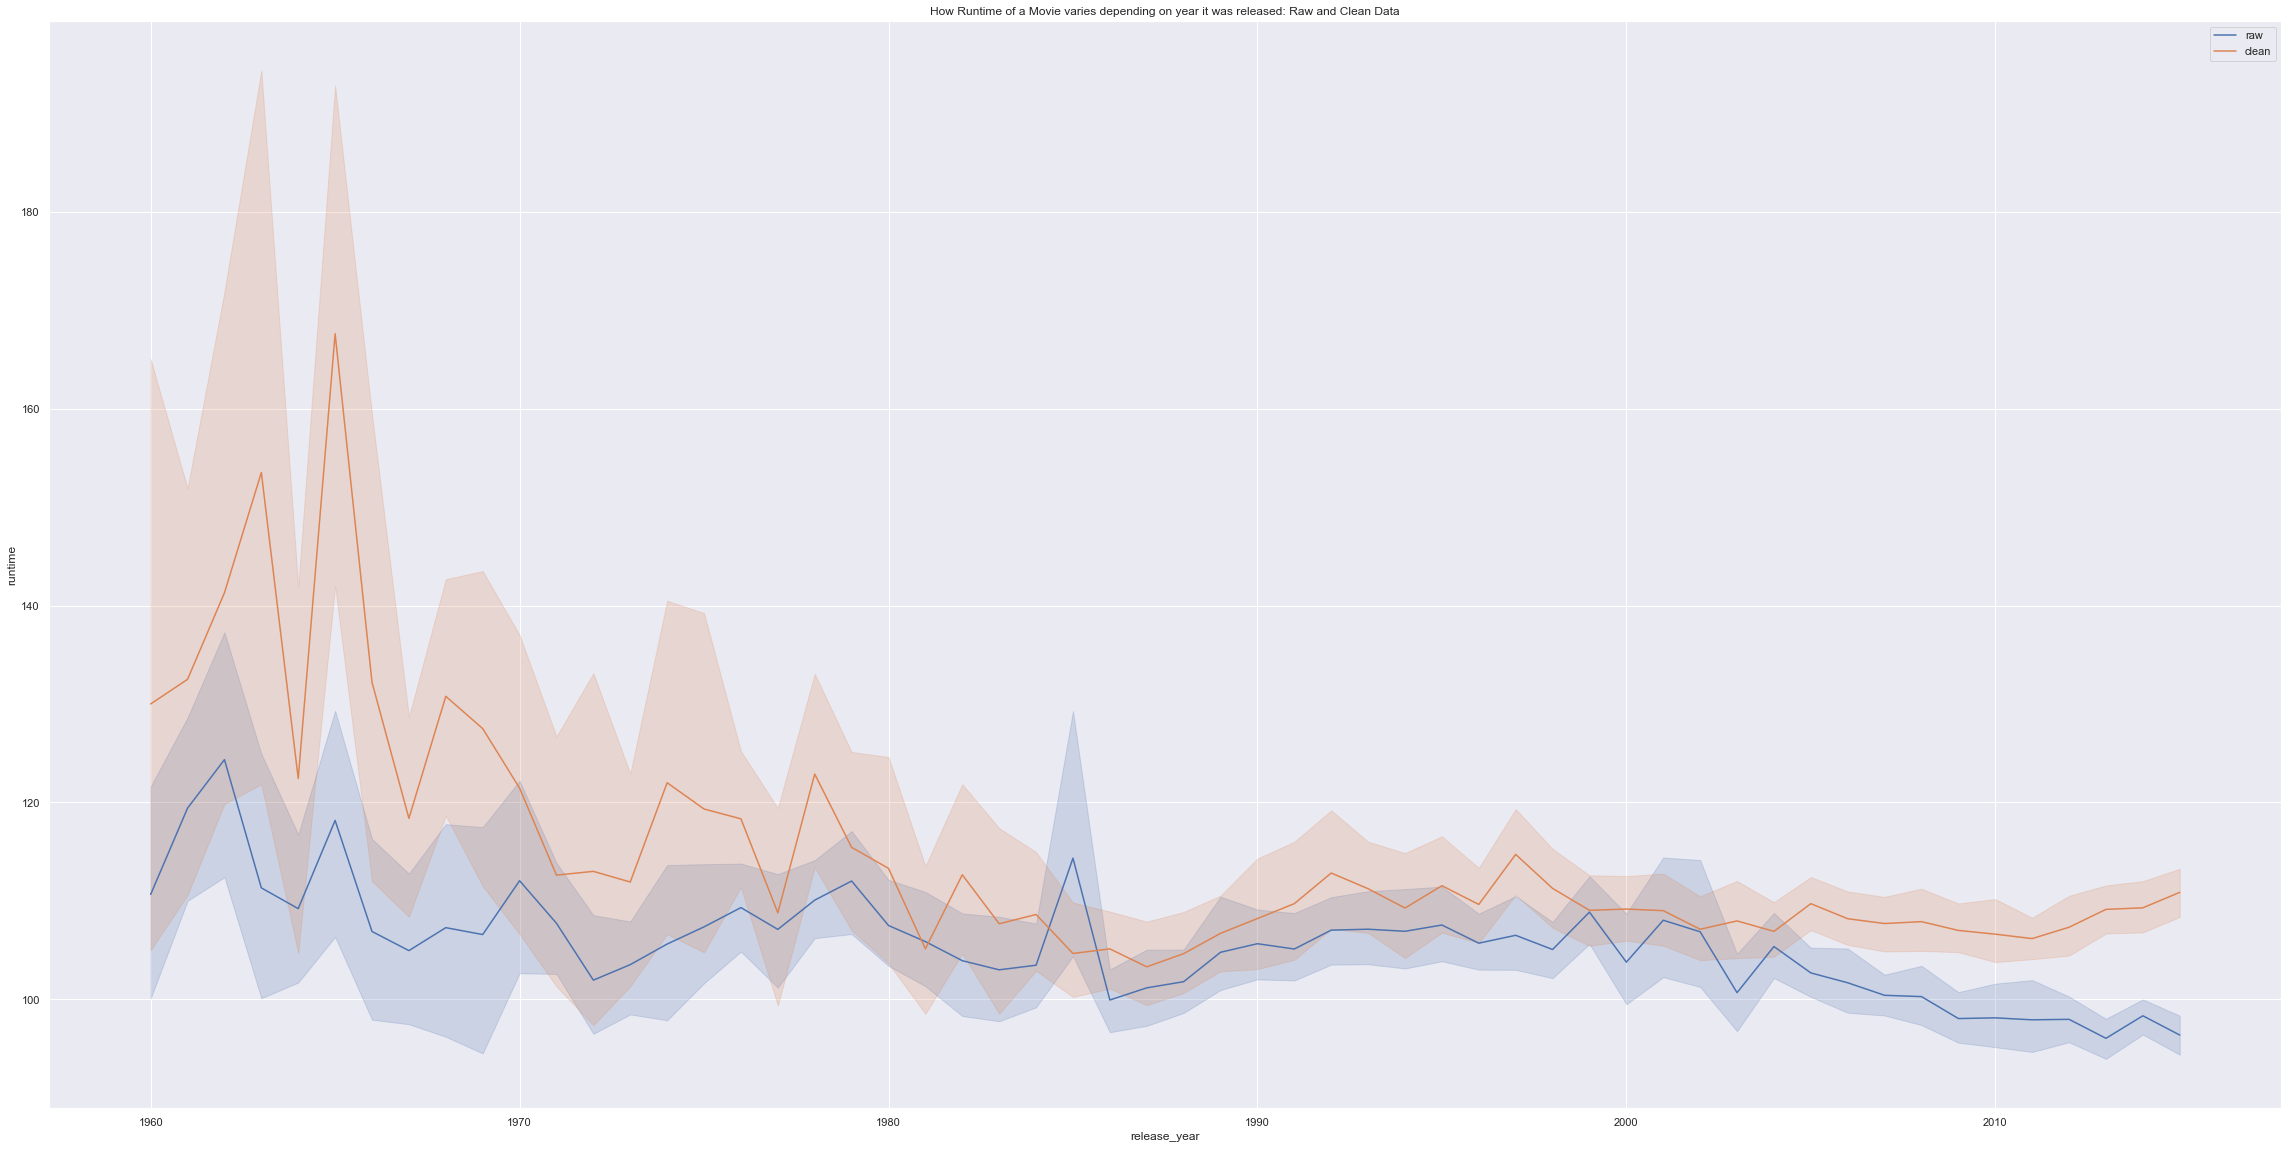

In [171]:
#plotting graph using Seaborn to show the difference when the raw and clean data have been used.

sns.set(rc={'figure.figsize':(40,20)})
sns.lineplot(x='release_year', y='runtime', data=df, label = 'raw')
sns.lineplot(x='release_year', y='runtime', data=dataset_2, label = 'clean').set_title('How Runtime of a Movie varies depending on year it was released: Raw and Clean Data')

<a id='conclusions'></a>
## Conclusions

As a result of the analysis performed in the above sections of this report a series of conclusions can be drawn from the TMDb Dataset

Firstly from Question 1 it is evident that the most popular movie genre overall is conclusively Drama. It is even more interesting to see that the top two most popular throughout the decades is exactly the same. Drama and Comedy were, in every decade examined, the most commonly produced movie genres. My initial thoughts given the huge cinema releases in the 2010s of the Marvel franchise etc, that action and adventure movies would place higher than they did. This action and adventure films were within the top 5 genres each decade. It is interesting similarly to see that western movies hardly changed in the number of productions across the decades. Other genres experienced massive spikes in interest such as documentary movies with under 50 movies produced in each of the 60s, 70s, and 80s.The 90s saw a reasonable increase in numbers while the 2000s spiked to over 100 and in the 2010s it again spiked to over 200 productions. This could be indicative of a change in technologies such as the internet gaining widespread use and the ease of access to information drastically increasing resulting in an increased desire for documentaries as well as an improved ability to make them.

From Question 2 some more interesting information has been gathered surrounding not just the examined variable of runtime dependent on release year but as well as the quality of the data used. From the analysis performed on the cleaned data the average movie runtime was found to be 109 minutes compared to the 102 minutes of the raw dataset. This was a result of a considerable number of 0 values for runtime present in the raw data. This was highlighted when the lowest runtime movie was found to be "Mythica: The Necromancer" which later was found to have a 95minute runtime. By ommitting the null data the lowest runtime movie was found to be Kid's Story with a runtime of 15minutes. Considering how much data was removed by removing zero values however the validity of this is somewhat questionable. 
Looking at the quantile ranges for the runtime gave a larger indication of what "standard" or nominal runtimes are. This is important information if you are looking to produce a movie as you likely want to fit within the nominal runtimes.

When looking at how runtime changed throughout the years, as decades would not have provided a large enough set of data to draw reasonable conclusions (being only 6 points). It is interesting to notice that in both the raw and clean data series there is a downward trend in average movie runtime until around 1990. At this point in the cleaned data the runtime values start to plateau out at 109 minutes while as expected the raw data continues to drop until the end of the data. It is curious that the runtimes for movies dropped throughout the years, my intial expectation was the complete opposite and that an increase in technology would have resulted in longer runtime films as the memory to store them decreased and recording equipment became more advanced. The complete contradication of this assumption is shocking and could hint that technological advances dont heavily affect the characteristics of a movie such as its runtime but simply improve the quality of the video. The decreasing runtime could also highlight a change in population characteristics with the later decades demographics potentially having a lower attention span than those watching movies in the 1960s and 1970s. This is however cannot be proven without further data on independent studies.

What I have learnt from this project.

Using this dataset I have learnt how to implement data wrangling and data cleaning techniques to prepare a dataset for analysis. Furthermore I have learn multiple methods of selecting and creating appropriate data for investigation such as separating a string by a delimiter or producing my own functions that allow for operations to be performed quickly across a numpy array or Pandas DataFrame. Similarly I have learnt the importance of using numpy and pandas when using large datasets in order to use vectorised operations to speed up the analysis. From this I have gained confidence in using python, Pandas and Numpy as well as introducing me to matplotlib and seaborn for the displaying on my results.